<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Trade_Stuff/blob/main/FTA_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [9]:
!pip install geopandas

In [11]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load your data
fta_data = pd.read_excel('/content/drive/MyDrive/Trade/fta_data.xlsx')  # Replace with your xlsx file path

In [ ]:
# Load the world map - This was low res and didn't contain singapore and mauritius and hence not used
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-21-cd5295a04da3>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [13]:
# Download the high-resolution dataset from Natural Earth
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip

# Unzip the downloaded file
!unzip ne_50m_admin_0_countries.zip

# Load the high-resolution world map
world = gpd.read_file('ne_50m_admin_0_countries.shp')


--2023-05-14 06:52:48--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip [following]
--2023-05-14 06:52:49--  https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 13.226.52.2, 13.226.52.56, 13.226.52.63, ...
Connecting to naciscdn.org (naciscdn.org)|13.226.52.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 799734 (781K) [application/zip]
Saving to: ‘ne_50m_admin_0_countries.zip’

ne_50m_admin_0_coun 100%[===================>] 780.99K  --.-KB/s    in 0.1s    

2023-05-14 06:52:49 (6.46 MB/s) - ‘ne_50m_admin_0_cou

In [ ]:
# #Check if all the names are available
# import geopandas as gpd

# # Your list of countries
# countries = ["Australia", "United Arab Emirates", "Mauritius", "Japan", "Malaysia", "South Korea", "Chile", "Thailand", 
#              "Singapore", "Afghanistan", "Sri Lanka", "Bangladesh", "Canada", "Israel", "New Zealand", "Peru", 
#              "United Kingdom", "Oman"]

# # Check if each country is in the GeoPandas dataset
# for country in countries:
#     if country in world['NAME'].values:
#         print(f"{country} is in the GeoPandas dataset.")
#     else:
#         print(f"{country} is NOT in the GeoPandas dataset.")

In [14]:
# Get the centroid of each country for arrow plotting
world['centroid'] = world['geometry'].centroid
centroids = {row['SOVEREIGNT']: (row['centroid'].x, row['centroid'].y) for _, row in world.iterrows()}

<ipython-input-14-40c516a0c748>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world['geometry'].centroid


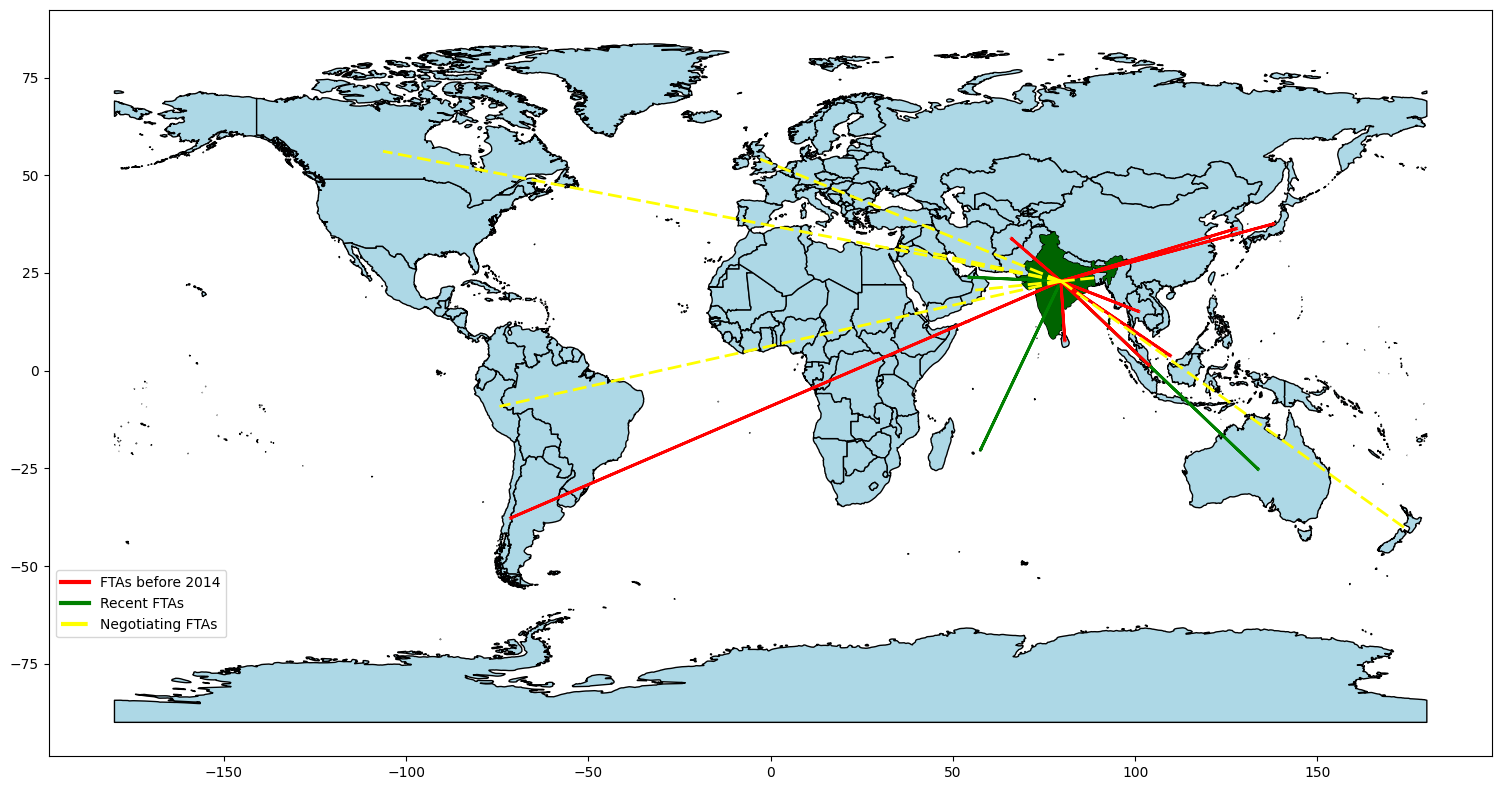

In [22]:
fig, ax = plt.subplots(figsize = (16,8))
# Plot the world map with all countries in white color
world.plot(ax=ax, facecolor='lightblue', edgecolor='black')

# Plot India in a different color (for example, light green)
world[world['SOVEREIGNT'] == 'India'].plot(ax=ax, facecolor='darkgreen')

# Replace the New Zealand centroid with a more accurate point on the landmass
centroids['New Zealand'] = (174.885971, -40.900557) # Wellington's coordinates
# Replace the Australia and Canada centroids with a more accurate point on the landmass
centroids['Australia'] = (133.775136, -25.274398) # Approximate geographical center of Australia
centroids['Canada'] = (-106.346771, 56.130366) # Approximate geographical center of Canada


# Iterate over your FTA data and plot arrows
for _, row in fta_data.iterrows():
    if row['country'] in centroids:
        x1, y1 = centroids['India']
        x2, y2 = centroids[row['country']]

        if row['status'] == 'negotiation':
            line = plt.Line2D((x1, x2), (y1, y2), color='yellow', linestyle='--', lw=2, dashes=(5, 2))
            ax.add_line(line)

        if row['status'] == 'active':
            if row['year'] <= 2014:
                plt.arrow(x1, y1, x2-x1, y2-y1, color='red', linestyle='solid', lw=2)
            else:
                plt.arrow(x1, y1, x2-x1, y2-y1, color='green', linestyle='solid', lw=2)

# Create legend
red_line = mlines.Line2D([], [], color='red', lw=3, label='FTAs before 2014')
green_line = mlines.Line2D([], [], color='green', lw=3, label='Recent FTAs')
yellow_line = mlines.Line2D([], [], color='yellow', linestyle='dashdot', lw=3, label='Negotiating FTAs')

plt.legend(handles=[red_line, green_line, yellow_line], bbox_to_anchor=(0, 0.15), loc='lower left')

plt.tight_layout()
                
# Save the plot as a high-resolution PNG
plt.savefig('/content/drive/MyDrive/Trade/fta_visualization.png', dpi=600)

# Show the plot
plt.show()